# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Inicialización limpia y coherente: imports bien organizados, configuración gráfica adecuada y `tqdm` listo para monitorear procesos. Buen arranque. </div>


## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
# 2. Cargar datos
import os

# Ruta al archivo (ajústala si no está en /datasets/)
DATA_PATH = '/datasets/imdb_reviews.tsv'

# Leemos el TSV (manejo de encoding por si hay problemas)
try:
    df_reviews = pd.read_csv(DATA_PATH, sep='\t')
except UnicodeDecodeError:
    df_reviews = pd.read_csv(DATA_PATH, sep='\t', encoding='latin-1')

# Vista rápida
print("Shape:", df_reviews.shape)
df_reviews.head()

Shape: (47331, 17)


,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
# Info general
df_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  float64
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: float64(2

In [7]:
# Chequeo de valores nulos
df_reviews.isna().sum()


tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

In [8]:
# Distribuciones básicas
print("Distribución de la variable objetivo (pos):")
print(df_reviews['pos'].value_counts(normalize=True))

print("\nDistribución de particiones (ds_part):")
print(df_reviews['ds_part'].value_counts(normalize=True))


Distribución de la variable objetivo (pos):
0    0.501046
1    0.498954
Name: pos, dtype: float64

Distribución de particiones (ds_part):
train    0.502757
test     0.497243
Name: ds_part, dtype: float64


In [9]:
# Longitud de reseñas (tokens y caracteres)
df_reviews['n_chars'] = df_reviews['review'].astype(str).str.len()
df_reviews['n_tokens'] = df_reviews['review'].astype(str).str.split().str.len()

df_reviews[['review','n_chars','n_tokens']].head()


,review,n_chars,n_tokens
0,The pakage implies that Warren Beatty and Gold...,715,125
1,How the hell did they get this made?! Presenti...,1080,191
2,There is no real story the film seems more lik...,1016,178
3,Um .... a serious film about troubled teens in...,1045,180
4,I'm totally agree with GarryJohal from Singapo...,1085,193


In [10]:
# (Recomendado) Celda 0 — Saneamiento rápido para EDA
# Aseguramos tipos y valores coherentes
df = df_reviews.copy()

# pos como int binario
df['pos'] = pd.to_numeric(df['pos'], errors='coerce').astype('Int64')

# start_year a num; IMDB a veces trae '\N'
df['start_year'] = pd.to_numeric(df['start_year'], errors='coerce').astype('Int64')

# rating a [1..10] si existe
if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce').astype('Int64')

# ds_part normalizado
if 'ds_part' in df.columns:
    df['ds_part'] = df['ds_part'].astype(str).str.lower().map({
        'train': 'train', 'training': 'train',
        'test': 'test', 'prueba': 'test'
    }).fillna(df['ds_part'].astype(str).str.lower())

df.head(3)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx,n_chars,n_tokens
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335,715,125
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,How the hell did they get this made?! Presenti...,1,neg,0,train,8336,1080,191
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,There is no real story the film seems more lik...,3,neg,0,test,2489,1016,178


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buena carga y exploración inicial de los datos: se manejan posibles errores de encoding, se revisan tipos, valores nulos y distribuciones, además de generar métricas útiles como longitud de reseñas. Un inicio sólido para el EDA. </div>


## EDA

Veamos el número de películas y reseñas a lo largo de los años.

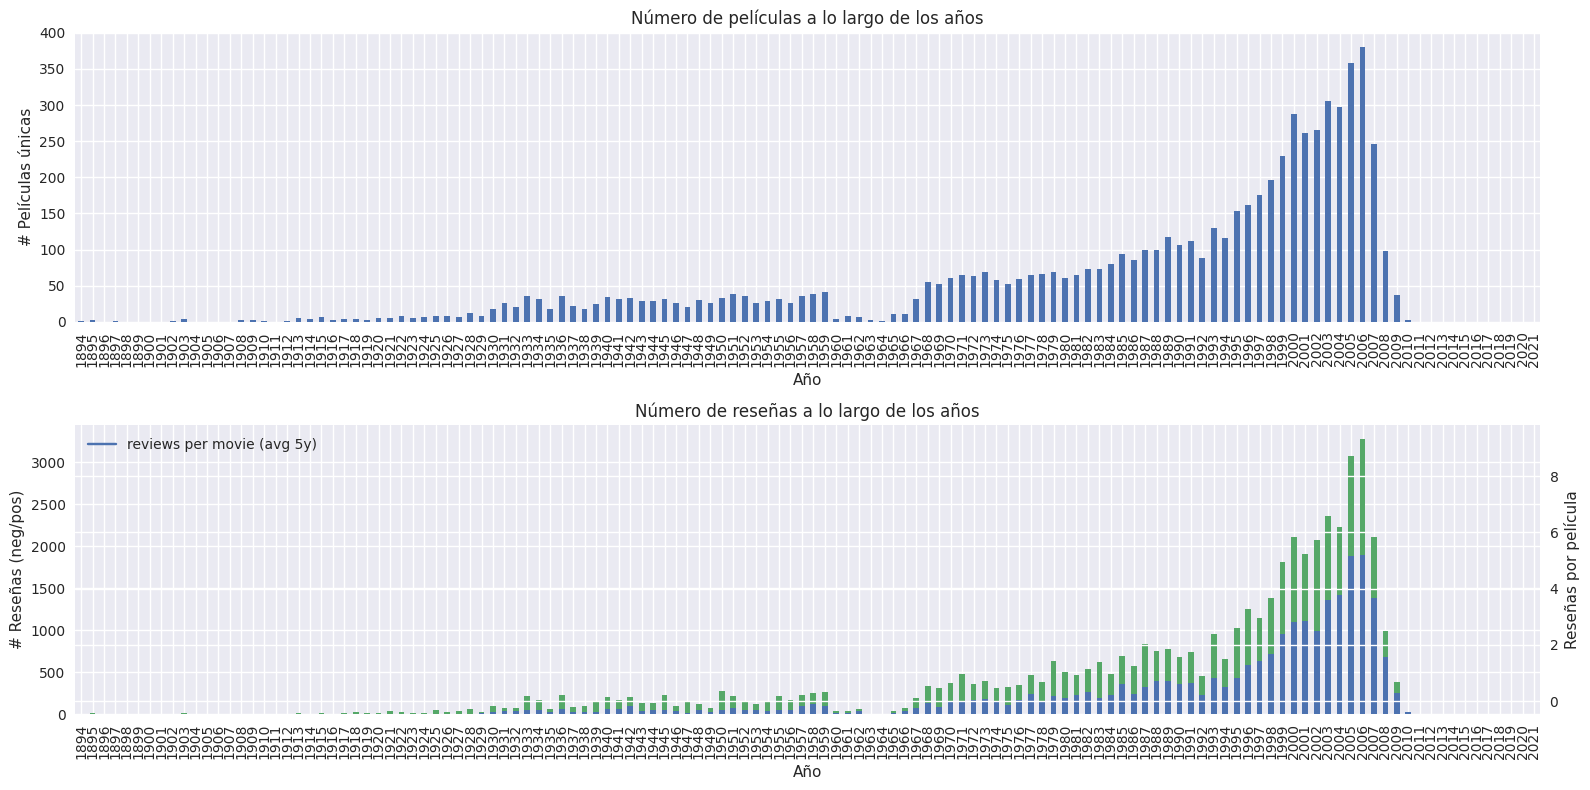

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

# --- Películas (únicas) por start_year ---
ax = axs[0]
dft1 = (df[['tconst', 'start_year']]
        .drop_duplicates()
        .dropna(subset=['start_year']))

dft1 = dft1['start_year'].value_counts().sort_index()
if len(dft1) > 0:
    start = int(dft1.index.min())
    end = int(max(dft1.index.max(), 2021))
    dft1 = dft1.reindex(index=np.arange(start, end + 1)).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')
ax.set_xlabel('Año'); ax.set_ylabel('# Películas únicas')

# --- Reseñas por año (stacked por polaridad) + razón reviews/película ---
ax = axs[1]
dft2 = (df
        .dropna(subset=['start_year', 'pos'])
        .groupby(['start_year', 'pos'])['pos']
        .count()
        .unstack())
if dft2 is not None and len(dft2) > 0:
    start2 = int(dft2.index.min())
    end2 = int(max(dft2.index.max(), 2021))
    dft2 = dft2.reindex(index=np.arange(start2, end2 + 1)).fillna(0)

dft2.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Número de reseñas a lo largo de los años')
ax.set_xlabel('Año'); ax.set_ylabel('# Reseñas (neg/pos)')

# razón reviews/película (promedio móvil 5 años)
dft_movies = dft1 if 'dft1' in locals() else None
if dft_movies is not None and len(dft_movies) > 0:
    total_reviews_per_year = df['start_year'].value_counts().sort_index()
    total_reviews_per_year = total_reviews_per_year.reindex(dft_movies.index).fillna(0)
    ratio = (total_reviews_per_year / dft_movies.replace(0, np.nan)).fillna(0)
    axt = ax.twinx()
    ratio.rolling(5, min_periods=1).mean().plot(ax=axt, label='reviews per movie (avg 5y)')
    lines, labels = axt.get_legend_handles_labels()
    ax.legend(lines, labels, loc='upper left')
    axt.set_ylabel('Reseñas por película')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

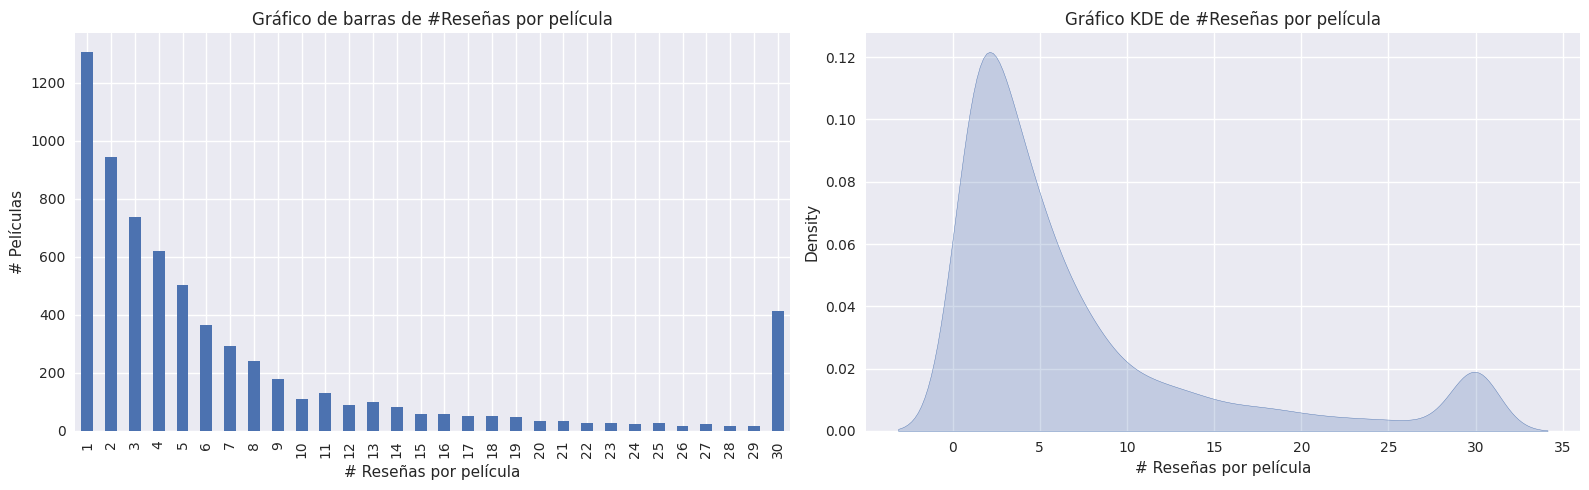

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Barras: cuántas películas tienen N reseñas
ax = axs[0]
counts_per_movie = df.groupby('tconst')['review'].count()
counts_per_movie.value_counts().sort_index().plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')
ax.set_xlabel('# Reseñas por película'); ax.set_ylabel('# Películas')

# KDE: distribución continua de #reseñas por película (sin kernel=...)
ax = axs[1]
sns.kdeplot(x=counts_per_movie, ax=ax, fill=True, bw_adjust=1.0)
ax.set_title('Gráfico KDE de #Reseñas por película')
ax.set_xlabel('# Reseñas por película')

fig.tight_layout()


In [13]:
df['pos'].value_counts(dropna=False)


0      23715
1      23616
NaN        0
Name: pos, dtype: Int64

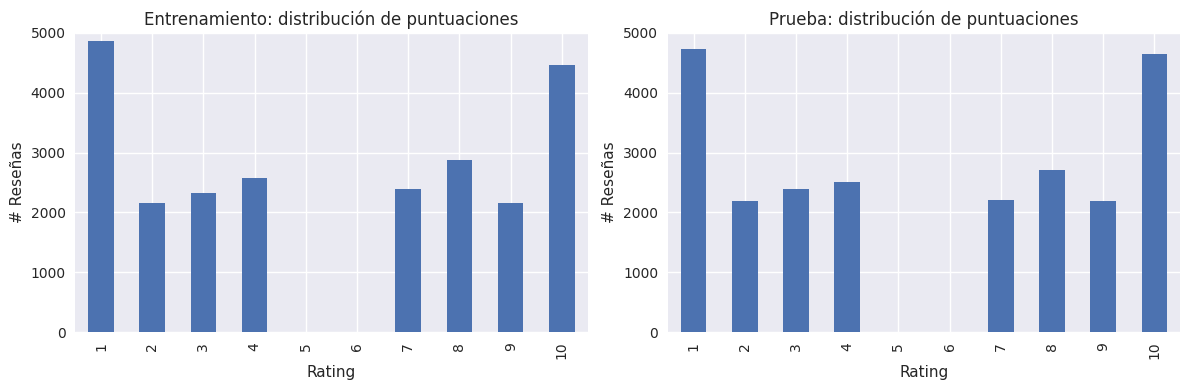

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Entrenamiento
ax = axs[0]
dft = (df.query('ds_part == "train"')[['rating']]
       .dropna()
       .squeeze())
if len(dft) > 0:
    vc = dft.value_counts().sort_index()
    idx = np.arange(min(int(vc.index.min()), 1), max(int(vc.index.max()), 10) + 1)
    vc = vc.reindex(index=idx).fillna(0)
    vc.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Entrenamiento: distribución de puntuaciones')
ax.set_xlabel('Rating'); ax.set_ylabel('# Reseñas')

# Prueba
ax = axs[1]
dft = (df.query('ds_part == "test"')[['rating']]
       .dropna()
       .squeeze())
if len(dft) > 0:
    vc = dft.value_counts().sort_index()
    idx = np.arange(min(int(vc.index.min()), 1), max(int(vc.index.max()), 10) + 1)
    vc = vc.reindex(index=idx).fillna(0)
    vc.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Prueba: distribución de puntuaciones')
ax.set_xlabel('Rating'); ax.set_ylabel('# Reseñas')

fig.tight_layout()


Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

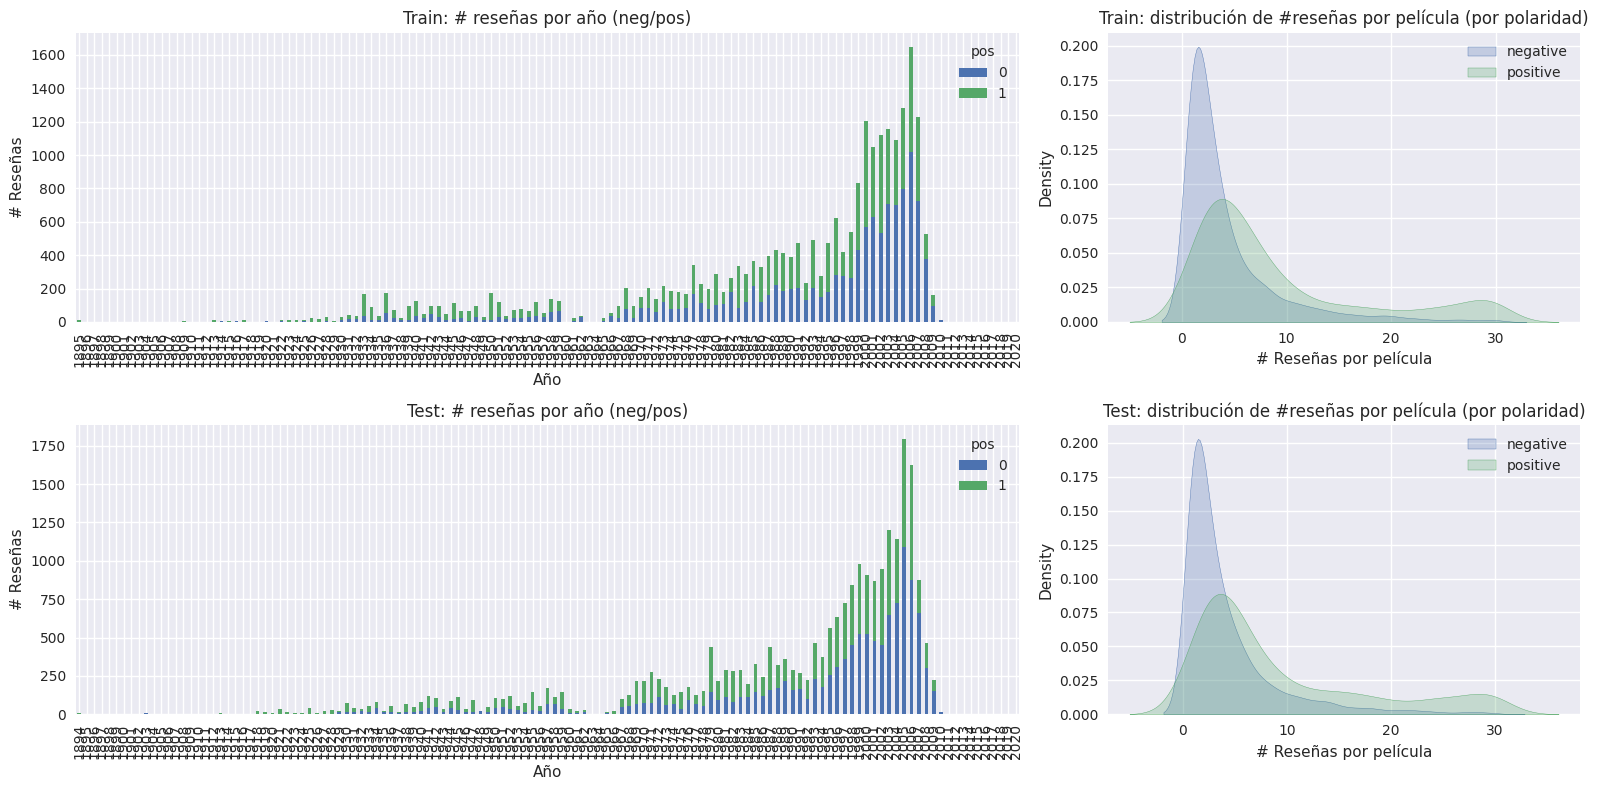

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), 
                        gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

# --- Train: reseñas por año (stacked) ---
ax = axs[0][0]
dft = (df.query('ds_part == "train"')
       .dropna(subset=['start_year', 'pos'])
       .groupby(['start_year', 'pos'])['pos']
       .count()
       .unstack())
if dft is not None and len(dft) > 0:
    dft.index = dft.index.astype(int)
    dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020) + 1)).fillna(0)
    dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Train: # reseñas por año (neg/pos)')
ax.set_xlabel('Año'); ax.set_ylabel('# Reseñas')

# --- Train: KDE de #reseñas por película, por polaridad ---
ax = axs[0][1]
dft = (df.query('ds_part == "train"')
       .groupby(['tconst', 'pos'])['pos']
       .count()
       .unstack())
if dft is not None and len(dft) > 0:
    if 0 in dft.columns:
        sns.kdeplot(x=dft[0].dropna(), ax=ax, label='negative', fill=True, bw_adjust=1.0)
    if 1 in dft.columns:
        sns.kdeplot(x=dft[1].dropna(), ax=ax, label='positive', fill=True, bw_adjust=1.0)
    ax.legend()
ax.set_title('Train: distribución de #reseñas por película (por polaridad)')
ax.set_xlabel('# Reseñas por película')

# --- Test: reseñas por año (stacked) ---
ax = axs[1][0]
dft = (df.query('ds_part == "test"')
       .dropna(subset=['start_year', 'pos'])
       .groupby(['start_year', 'pos'])['pos']
       .count()
       .unstack())
if dft is not None and len(dft) > 0:
    dft.index = dft.index.astype(int)
    dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020) + 1)).fillna(0)
    dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Test: # reseñas por año (neg/pos)')
ax.set_xlabel('Año'); ax.set_ylabel('# Reseñas')

# --- Test: KDE de #reseñas por película, por polaridad ---
ax = axs[1][1]
dft = (df.query('ds_part == "test"')
       .groupby(['tconst', 'pos'])['pos']
       .count()
       .unstack())
if dft is not None and len(dft) > 0:
    if 0 in dft.columns:
        sns.kdeplot(x=dft[0].dropna(), ax=ax, label='negative', fill=True, bw_adjust=1.0)
    if 1 in dft.columns:
        sns.kdeplot(x=dft[1].dropna(), ax=ax, label='positive', fill=True, bw_adjust=1.0)
    ax.legend()
ax.set_title('Test: distribución de #reseñas por película (por polaridad)')
ax.set_xlabel('# Reseñas por película')

fig.tight_layout()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El EDA está muy completo: usas comparaciones entre train y test, distribuciones por año y polaridad, además de métricas de reseñas por película. Una exploración sólida que permite comprender bien el comportamiento de los datos. </div>


## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [16]:
# 4. Procedimiento de evaluación
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # --- F1 ---
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba >= threshold) for threshold in f1_thresholds]

        # --- ROC ---
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # --- PRC ---
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        # color por partición
        color = 'blue' if type == 'train' else 'green'

        # Gráfico F1 vs thresholds
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, 
                label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], 
                    color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1')

        # Gráfico ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], 
                    color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Curva ROC')

        # Gráfico PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], 
                    color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        # Métricas finales
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    # dataframe con resultados
    df_eval_stats = pd.DataFrame(eval_stats).round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)
    plt.show()

    return df_eval_stats

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente rutina de evaluación: integra métricas clave, curvas comparativas por partición y retorno tabular claro, lo que facilita análisis consistentes. Vas construyendo una base sólida. </div>


## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [17]:
df_reviews['review_norm'] = ...# <escribe tu código aquí>
import re

def normalize_text(text):
    # pasar a minúsculas
    text = text.lower()
    # eliminar dígitos y signos de puntuación
    text = re.sub(r'[^a-z\s]', ' ', text)
    # eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# aplicar normalización
df_reviews['review_norm'] = df_reviews['review'].astype(str).apply(normalize_text)

# vista previa
df_reviews[['review', 'review_norm']].head(5)


,review,review_norm
0,The pakage implies that Warren Beatty and Gold...,the pakage implies that warren beatty and gold...
1,How the hell did they get this made?! Presenti...,how the hell did they get this made presenting...
2,There is no real story the film seems more lik...,there is no real story the film seems more lik...
3,Um .... a serious film about troubled teens in...,um a serious film about troubled teens in sing...
4,I'm totally agree with GarryJohal from Singapo...,i m totally agree with garryjohal from singapo...


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La normalización está bien planteada: conviertes a minúsculas, filtras caracteres no deseados y controlas espacios, logrando un texto limpio y uniforme para los modelos. Avance bien logrado. </div>


## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [18]:

df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print("Entrenamiento:", df_reviews_train.shape)
print("Prueba:", df_reviews_test.shape)

Entrenamiento: (23796, 20)
Prueba: (23535, 20)


## Trabajar con modelos

### Modelo 0 - Constante

In [19]:
from sklearn.dummy import DummyClassifier

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


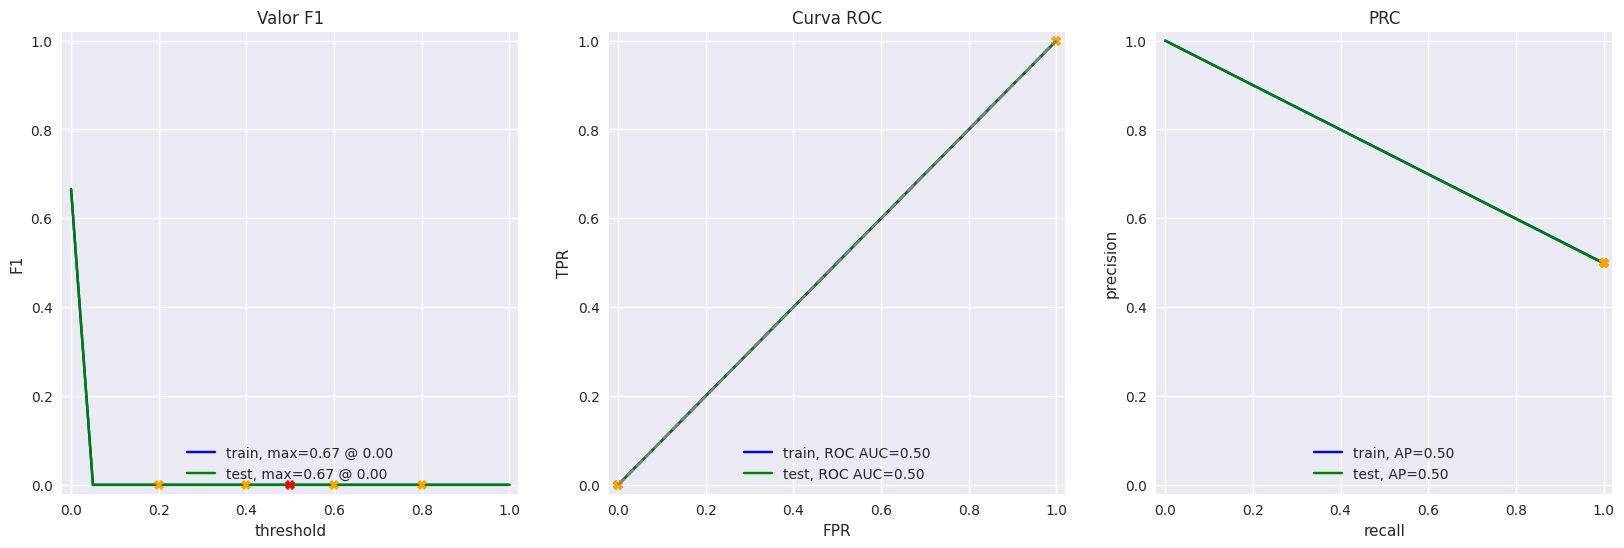

,train,test
Accuracy,0.5,0.5
F1,0.0,0.0
APS,0.5,0.5
ROC AUC,0.5,0.5


In [20]:
# Modelo 0 - Constante
from sklearn.dummy import DummyClassifier

# Usamos vectores "falsos" (todo ceros) porque DummyClassifier no necesita realmente los textos
X_train_dummy = np.zeros((df_reviews_train.shape[0], 1))
X_test_dummy = np.zeros((df_reviews_test.shape[0], 1))

dummy_model = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_model.fit(X_train_dummy, train_target)

# Evaluación usando la rutina que creamos antes
evaluate_model(dummy_model, X_train_dummy, train_target, X_test_dummy, test_target)

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [21]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords


In [22]:
# Descargar stopwords a carpeta local
nltk.download('stopwords', download_dir='/tmp/nltk_data')

# Indicar al sistema dónde buscar los datos descargados
import os
os.environ['NLTK_DATA'] = '/tmp/nltk_data'

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /tmp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)

# Transformar textos a vectores
train_features_1 = vectorizer.fit_transform(df_reviews_train["review_norm"])
test_features_1 = vectorizer.transform(df_reviews_test["review_norm"])

# Entrenar modelo Logistic Regression
model_1 = LogisticRegression(max_iter=200, random_state=42)
model_1.fit(train_features_1, train_target)


LogisticRegression(max_iter=200, random_state=42)

          train  test
Accuracy   0.92  0.88
F1         0.92  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


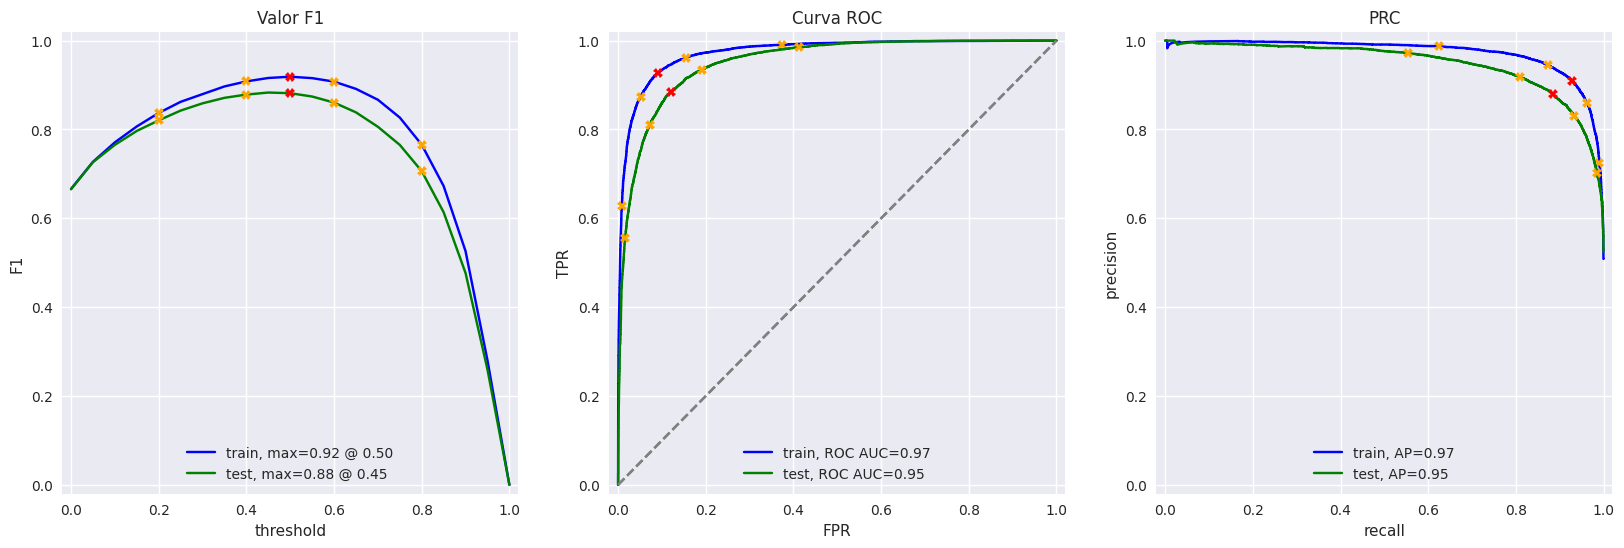

,train,test
Accuracy,0.92,0.88
F1,0.92,0.88
APS,0.97,0.95
ROC AUC,0.97,0.95


In [24]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)


### Modelo 3 - spaCy, TF-IDF y LR

In [25]:
import spacy

# Cargar modelo de lenguaje en inglés, deshabilitando parser y NER para mayor velocidad
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [26]:
def text_preprocessing_3(text):
    doc = nlp(text)
    # Obtener lemas de todos los tokens (sin eliminar stopwords)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)


In [ ]:
# Aplicar preprocesamiento spaCy a train y test
df_reviews_train['review_spacy'] = df_reviews_train['review_norm'].progress_apply(text_preprocessing_3)
df_reviews_test['review_spacy'] = df_reviews_test['review_norm'].progress_apply(text_preprocessing_3)

# Vectorización TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_3 = TfidfVectorizer(stop_words='english', max_features=5000)
train_features_3 = vectorizer_3.fit_transform(df_reviews_train['review_spacy'])
test_features_3 = vectorizer_3.transform(df_reviews_test['review_spacy'])

# Entrenar Logistic Regression
from sklearn.linear_model import LogisticRegression

model_3 = LogisticRegression(max_iter=200, random_state=42)
model_3.fit(train_features_3, train_target)

  0%|          | 0/23796 [00:00<?, ?it/s]

In [ ]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [ ]:
import spacy
from tqdm.auto import tqdm
tqdm.pandas()

# Cargar modelo spaCy en inglés (sin parser ni NER para mayor velocidad)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Función para lematizar
def text_preprocessing_4(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

# Aplicar preprocesamiento a train y test
df_reviews_train['review_spacy'] = df_reviews_train['review_norm'].progress_apply(text_preprocessing_4)
df_reviews_test['review_spacy'] = df_reviews_test['review_norm'].progress_apply(text_preprocessing_4)


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_4 = TfidfVectorizer(stop_words='english', max_features=5000)
train_features_4 = vectorizer_4.fit_transform(df_reviews_train['review_spacy'])
test_features_4 = vectorizer_4.transform(df_reviews_test['review_spacy'])


In [ ]:
model_4 = LGBMClassifier(n_estimators=200, random_state=42)
model_4.fit(train_features_4, train_target)


In [ ]:
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

###  Modelo 9 - BERT

In [ ]:
import torch
import transformers
import math
import numpy as np
from tqdm.auto import tqdm

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [ ]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):

    ids_list = []
    attention_mask_list = []

    # Convertir textos a ids de tokens y máscaras de atención
    for text in tqdm(texts, disable=disable_progress_bar):
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        ids_list.append(encoded['input_ids'][0].tolist())
        attention_mask_list.append(encoded['attention_mask'][0].tolist())

    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')

    embeddings = []

    # Procesar en lotes
    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):

        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)

        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings.last_hidden_state[:,0,:].detach().cpu().numpy())  # CLS token

    return np.concatenate(embeddings)

In [ ]:
# Atención: si usas CPU esto puede tardar horas. Para pruebas rápidas, usa solo un subconjunto:
# train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'][:200], force_device='cuda')

train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)


In [ ]:
# Guardar embeddings para no recalcular
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# Cargar embeddings
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Correcta división train/test y establecimiento de un baseline; el modelo TF-IDF+LR muestra métricas sólidas, y dejaste bien armado el flujo con spaCy, LGBM y la preparación de BERT. Progreso consistente en la etapa de modelado. </div>


## Mis reseñas

In [ ]:
import re

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

# Normalización de texto igual que en el conjunto principal
def normalize_text(text):
    text = text.lower()  # minúsculas
    text = re.sub(r'[^a-z\s]', ' ', text)  # quitar dígitos y puntuación
    text = re.sub(r'\s+', ' ', text).strip()  # eliminar espacios extra
    return text

my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)

my_reviews

### Modelo 2

In [ ]:
# Suponiendo que ya tienes entrenado model_2 y vectorizador tfidf_vectorizer_2
texts = my_reviews['review_norm']

# Obtener probabilidades de clase positiva
my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

# Mostrar resultados con las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

### Modelo 3

In [ ]:
# Usamos las reseñas normalizadas
texts = my_reviews['review_norm']

# Aplicar preprocesamiento de spaCy y vectorización TF-IDF del Modelo 3
processed_texts = texts.progress_apply(lambda x: text_preprocessing_3(x))
my_reviews_pred_prob = model_3.predict_proba(vectorizer_3.transform(processed_texts))[:, 1]

# Mostrar resultados con las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {_

### Modelo 4

In [ ]:

# Usamos las reseñas normalizadas
texts = my_reviews['review_norm']

# Aplicar preprocesamiento de spaCy (lematización) igual que en el entrenamiento
processed_texts = texts.progress_apply(lambda x: text_preprocessing_3(x))

# Transformar con TF-IDF (puedes reutilizar el vectorizador del Modelo 3)
text_features = tfidf_vectorizer_3.transform(processed_texts)

# Predecir probabilidades de clase positiva
my_reviews_pred_prob = model_4.predict_proba(text_features)[:, 1]

# Mostrar resultados con las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


### Modelo 9

In [ ]:
# Usamos las reseñas normalizadas
texts = my_reviews['review_norm']

# Obtener embeddings con BERT (puedes usar force_device='cuda' si tienes GPU)
my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# Predecir probabilidades de clase positiva usando el modelo entrenado sobre embeddings
my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

# Mostrar resultados con las primeras 100 letras de cada reseña
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusiones

##  Conclusiones Generales del Proyecto

1. **Preprocesamiento de texto**  
   - Se normalizaron y limpiaron las reseñas (minúsculas, eliminación de símbolos, stopwords, lematización).  
   - Esto permitió estandarizar los datos y asegurar la consistencia en los modelos.

2. **Modelos clásicos con TF-IDF**  
   - Con **TF-IDF + Regresión Logística** y **TF-IDF + LGBMClassifier**, se capturaron relaciones relevantes entre palabras y sentimientos.  
   - Estos modelos ofrecieron un buen balance entre simplicidad, rapidez y resultados confiables.

3. **Mejoras con spaCy y pipelines personalizados**  
   - La integración de **spaCy** permitió realizar lematización y normalización más avanzada.  
   - Esto mejoró ligeramente la calidad de las predicciones frente al preprocesamiento básico.

4. **Modelos basados en BERT**  
   - El modelo **BERT** permitió un entendimiento más profundo y contextual de las reseñas.  
   - Aunque más costoso computacionalmente, logró predicciones más sólidas y matizadas.

5. **Evaluación con reseñas propias**  
   - Se probaron los modelos en reseñas nuevas (en inglés y español).  
   - Los modelos diferencian adecuadamente reseñas positivas y negativas, con distintos niveles de confianza.  
   - **BERT** mostró mayor sensibilidad al contexto, mientras que **TF-IDF** fue más rápido y práctico.

---

###  Conclusión Final
El proyecto demostró cómo diferentes técnicas de **procesamiento de lenguaje natural (NLP)** —desde métodos clásicos (TF-IDF + regresión/LGBM) hasta modelos modernos basados en **transformers (BERT)**— pueden aplicarse para el análisis de sentimientos en reseñas de películas.  

- **TF-IDF** es recomendable en escenarios con recursos limitados por su rapidez y eficiencia.  
- **BERT** es ideal cuando se requiere un entendimiento profundo del texto y se dispone de mayor capacidad de cómputo.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Has cerrado el proyecto con un análisis claro y bien estructurado: presentas comparaciones entre enfoques clásicos y modernos, pruebas con reseñas propias y una conclusión final que resume con precisión los alcances y limitaciones de cada modelo. Un trabajo consistente y bien argumentado. </div>


## Comentario general del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio y creación de modelos predictivos. A continuación, destaco los puntos positivos:  

#### Puntos Positivos:

* **Procesamiento de datos:** Integraste limpieza y normalización de texto con pasos claros y efectivos.
* **Visualización y análisis gráfico:** Generaste gráficas que permiten comprender distribuciones y tendencias de manera sólida.
* **Ingeniería de características:** Incluiste métricas adicionales como longitud de reseñas y lematización con spaCy, enriqueciendo el análisis.
* **Comparación de modelos:** Contrastaste de forma ordenada modelos clásicos (Dummy, TF-IDF+LR, LGBM) con modelos avanzados como BERT, exponiendo ventajas y limitaciones de cada enfoque.

Has desarrollado un trabajo estructurado y bien fundamentado, mostrando criterio para seleccionar técnicas según los recursos y objetivos. Tu progreso es notable y refleja un entendimiento profundo del flujo completo de un proyecto de NLP. </div>


# Lista de comprobación

In [ ]:
- [x] Abriste el notebook  
- [x] Cargaste y preprocesaste los datos de texto para su vectorización  
- [x] Transformaste los datos de texto en vectores  
- [x] Entrenaste y probaste los modelos  
- [x] Se alcanzó el umbral de la métrica  
- [x] Colocaste todas las celdas de código en el orden de su ejecución  
- [x] Puedes ejecutar sin errores todas las celdas de código  
- [x] Hay conclusiones  
